In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from gammapy.maps import Map, MapAxis, HpxGeom, WcsGeom

In [3]:
import pandas as pd
from tqdm.notebook import tqdm
from math import sqrt

In [60]:
hpx_geom = HpxGeom(nside=1024, nest=True, frame='galactic', region='DISK(157,52,3)')

In [61]:
hpx_map = Map.from_geom(hpx_geom)

In [62]:
hpx_map.geom

HpxGeom

	axes       : ['skycoord']
	shape      : (8626,)
	ndim       : 2
	nside      : 1024
	nested     : True
	frame   : galactic
	projection : HPX
	center     : 157.0 deg, 52.0 deg

In [57]:
table = pd.read_csv('/home/rt2122/Data/selected_north/sweep-150p050-160p055.csv')
ra = table['RA']
dec = table['DEC']
flux_g = table['FLUX_G']
sc = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
lon = sc.galactic.l.degree
lat = sc.galactic.b.degree

In [58]:
del(table)
del(ra)
del(dec)
del(sc)

In [59]:
flux_g = np.log(flux_g)
flux_g[np.isnan(flux_g)] = 0

/home/rt2122/anaconda3/envs/gammapy-0.17/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rt2122/anaconda3/envs/gammapy-0.17/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [63]:
for i in tqdm(range(len(lon))):
    hpx_map.set_by_coord((lon[i], lat[i]), vals=flux_g[i])

(<Figure size 432x288 with 1 Axes>,
 None)

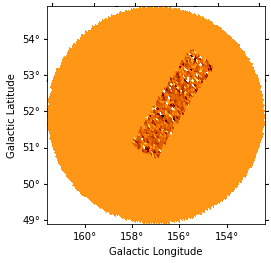

In [65]:
hpx_map.plot()

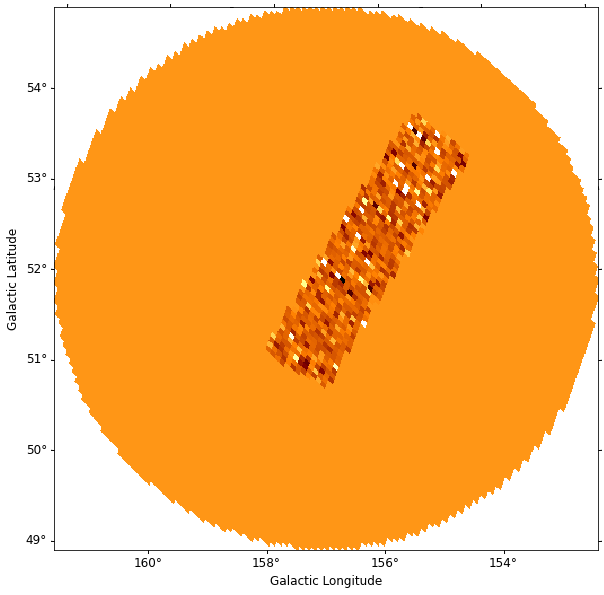

In [66]:
rc_params = {
    "figure.figsize": (10, 10),
    "font.size": 12,
    #"axes.formatter.limits": (2, -2),
}
fig, ax, im = None, None, None
with plt.rc_context(rc=rc_params):
    fig, ax, im = hpx_map.plot()

In [53]:
wcs_map = hpx_map.to_wcs()

(<Figure size 432x288 with 1 Axes>,
 None)

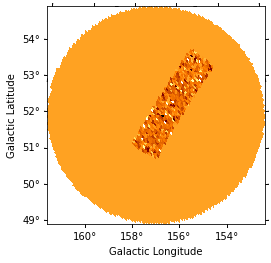

In [54]:
wcs_map.plot()

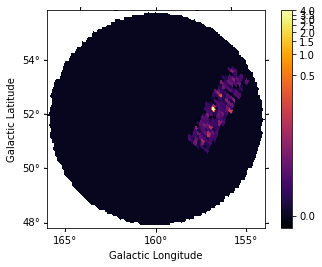

In [21]:
smoothed = wcs_map.smooth(width=0.01 * u.deg, kernel="gauss")
smoothed.plot(stretch="log", add_cbar=True, vmax=4, cmap="inferno");

In [64]:
hpx_map.data.min()

-inf